(<matplotlib.colorbar.Colorbar at 0x1ce899e7a00>,
 Text(0.5, 0, 'Position'),
 Text(0, 0.5, 'time'))

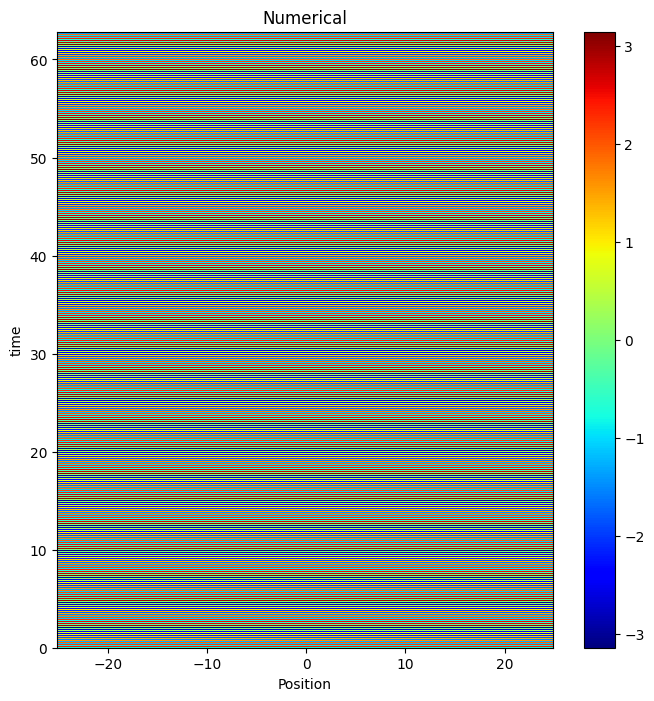

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import cmath as cm
px = 1/plt.rcParams['figure.dpi']

def RungeKutta(t,interval,func,initial):
    dt = abs(t[2]-t[1]);
    df = np.zeros([np.size(initial),np.size(t)],'complex');
    df[:,0] = initial;
    for i in range(np.size(t)-1):
        k1 = func(df[:,i],interval)
        k2 = func(df[:,i]+dt/2*k1,interval)
        k3 = func(df[:,i]+dt*k2/2,interval)
        k4 = func(df[:,i]+dt*k3,interval)
        df[:,i+1] = df[:,i] + 1/6*(k1+2*k2+2*k3+k4)*dt
    return df

def FourierDerivative(func,interval,ndif):
    k0 = 2*np.pi/(interval[1]-interval[0])
    L = int(np.size(func)/2)
    m = np.concatenate([np.linspace(0,L-1,L),np.linspace(-L,-1,L)])
    for i in range(ndif):
        func = np.fft.ifft(1j*m*k0*np.fft.fft(func))
        i = i+1
        # if np.imag(func) > 1:
        #     print("Warning: Imaginary part is grater than 1")
    return func


def Hamiltonian(func,interval):
    x = np.linspace(interval[0],interval[1], np.size(func)+1)
    x = x[:-1]
    return -1j*(np.vdot(func,func)*func) #(-FourierDerivative(func,interval,2))


L = 50; # Length of interval
N = 200; # Points of discretization
tmax = 20*np.pi; # endtime
dt = 1/N; # Time step

x = np.linspace(-L/2,L/2, N+1) # Due to periodicty (Fourier) the last value cant be used
x = x[:-1]

t = np.arange(0,tmax,dt) # time grid

X,T = np.meshgrid(x,t) # Only used fot plotting

# Initialize
initial = np.sqrt(2)*np.cosh(x) # Analytical with B = 1
# initial = np.sqrt(8)/np.cosh(2*x)
# initial = np.sqrt(8)*np.exp(-0.2j*x)/np.cosh(2*x+30) - np.sqrt(8)/np.cosh(2*x)
# initial = np.sqrt(2)*np.exp(0.1j*x)/np.cosh(x)
# initial = np.sqrt(8)/np.cosh(x)

data = RungeKutta(t,[-L/2,L/2],Hamiltonian,initial)

fig = plt.figure(figsize=(800*px, 800*px));
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Numerical')
colormesh1 = ax1.pcolormesh(X,T,abs(np.transpose(data)**2)+1e-7,shading='auto',cmap='jet')
fig.colorbar(colormesh1,ax=ax1),ax1.set_xlabel('Position'),ax1.set_ylabel('time')